In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importing the data and splitting it into training and testing tes
((trainX, trainY), (testX, testY)) = mnist.load_data()

In [3]:
#scaling data to the range [0, 1]
trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0
trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)

In [4]:
trainX.shape

(60000, 28, 28, 1)

In [5]:
#converting the labels from integers to vectors
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.fit_transform(testY)

In [7]:
classes = 10
inputShape = (28, 28, 1)

In [8]:
def model():
    model = Sequential()
    model.add(Conv2D(20, (5,5), padding = 'same', input_shape = inputShape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
    model.add(Conv2D(50, (5, 5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model

In [9]:
#initializing the model
batch_size = 128
epochs = 20
opt = SGD(lr = 0.01)

In [10]:
model = model()
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________

In [11]:
H = model.fit(trainX, trainY, validation_data = (testX, testY), batch_size = 128, epochs = 20, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 514us/sample - loss: 0.9988 - acc: 0.7401 - val_loss: 0.2943 - val_acc: 0.9182
Epoch 2/20
60000/60000 [==============================] - 31s 517us/sample - loss: 0.2591 - acc: 0.9223 - val_loss: 0.1972 - val_acc: 0.9402
Epoch 3/20
60000/60000 [==============================] - 31s 524us/sample - loss: 0.1826 - acc: 0.9459 - val_loss: 0.1497 - val_acc: 0.9538
Epoch 4/20
60000/60000 [==============================] - 31s 513us/sample - loss: 0.1399 - acc: 0.9584 - val_loss: 0.1163 - val_acc: 0.9657
Epoch 5/20
60000/60000 [==============================] - 31s 520us/sample - loss: 0.1141 - acc: 0.9665 - val_loss: 0.0955 - val_acc: 0.9711
Epoch 6/20
60000/60000 [==============================] - 31s 513us/sample - loss: 0.0971 - acc: 0.9714 - val_loss: 0.0811 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 31s 512us/sample - loss: 0.0852 - acc: 0.9746 

In [12]:
#evaluate the network
predictions = model.predict(testX, batch_size = 128)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1),
                           target_names = [str(x) for x in le.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



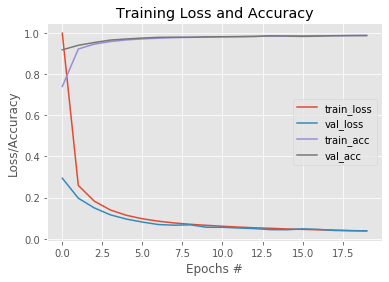

In [13]:
#plot the training  loss and accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 20), H.history['loss'], label = 'train_loss')
plt.plot(np.arange(0, 20), H.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(0, 20), H.history['acc'], label = 'train_acc')
plt.plot(np.arange(0, 20), H.history['val_acc'], label = 'val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()